<a href="https://colab.research.google.com/github/mlynarik/Python/blob/master/confusion_matrix_proba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification table, without normalization
[[2 0]
 [0 2]]


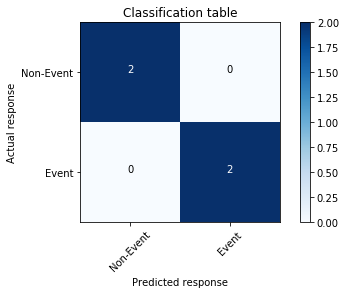

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing as pp
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Classification table', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized classification table")
    else:
        print('Classification table, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual response')
    plt.xlabel('Predicted response')
    plt.show()

def classification_table(actual_response, predicted_prob, threshold=0.5):
    predicted_response = pp.binarize([predicted_prob],threshold)[0]
    return confusion_matrix(actual_response,predicted_response)
  
x = np.array([0,0,1,1])
y = np.array([0.2,0.5,0.6,0.7])
cm = classification_table(x,y,0.5)
plot_confusion_matrix(cm,['Non-Event','Event']) 